In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 96

In [15]:
test_x = np.linspace(-5, 5, 11)
test_y = np.sin(test_x)
ethalon = pd.DataFrame({ 'x': test_x, 'y': test_y })
ethalon.to_csv('input.csv', sep=';', index=None, header=None)

In [16]:
import os
%env LC_ALL=C
for i in range(1, 4):
    os.system(f'dotnet run -- -f -5 -t 5 -n 1001 -d {i} <input.csv >poly{i}.csv')

env: LC_ALL=C


In [48]:
!dotnet run -- -f -5 -t 5 -n 1001 -d 10 <input.csv >poly10.csv

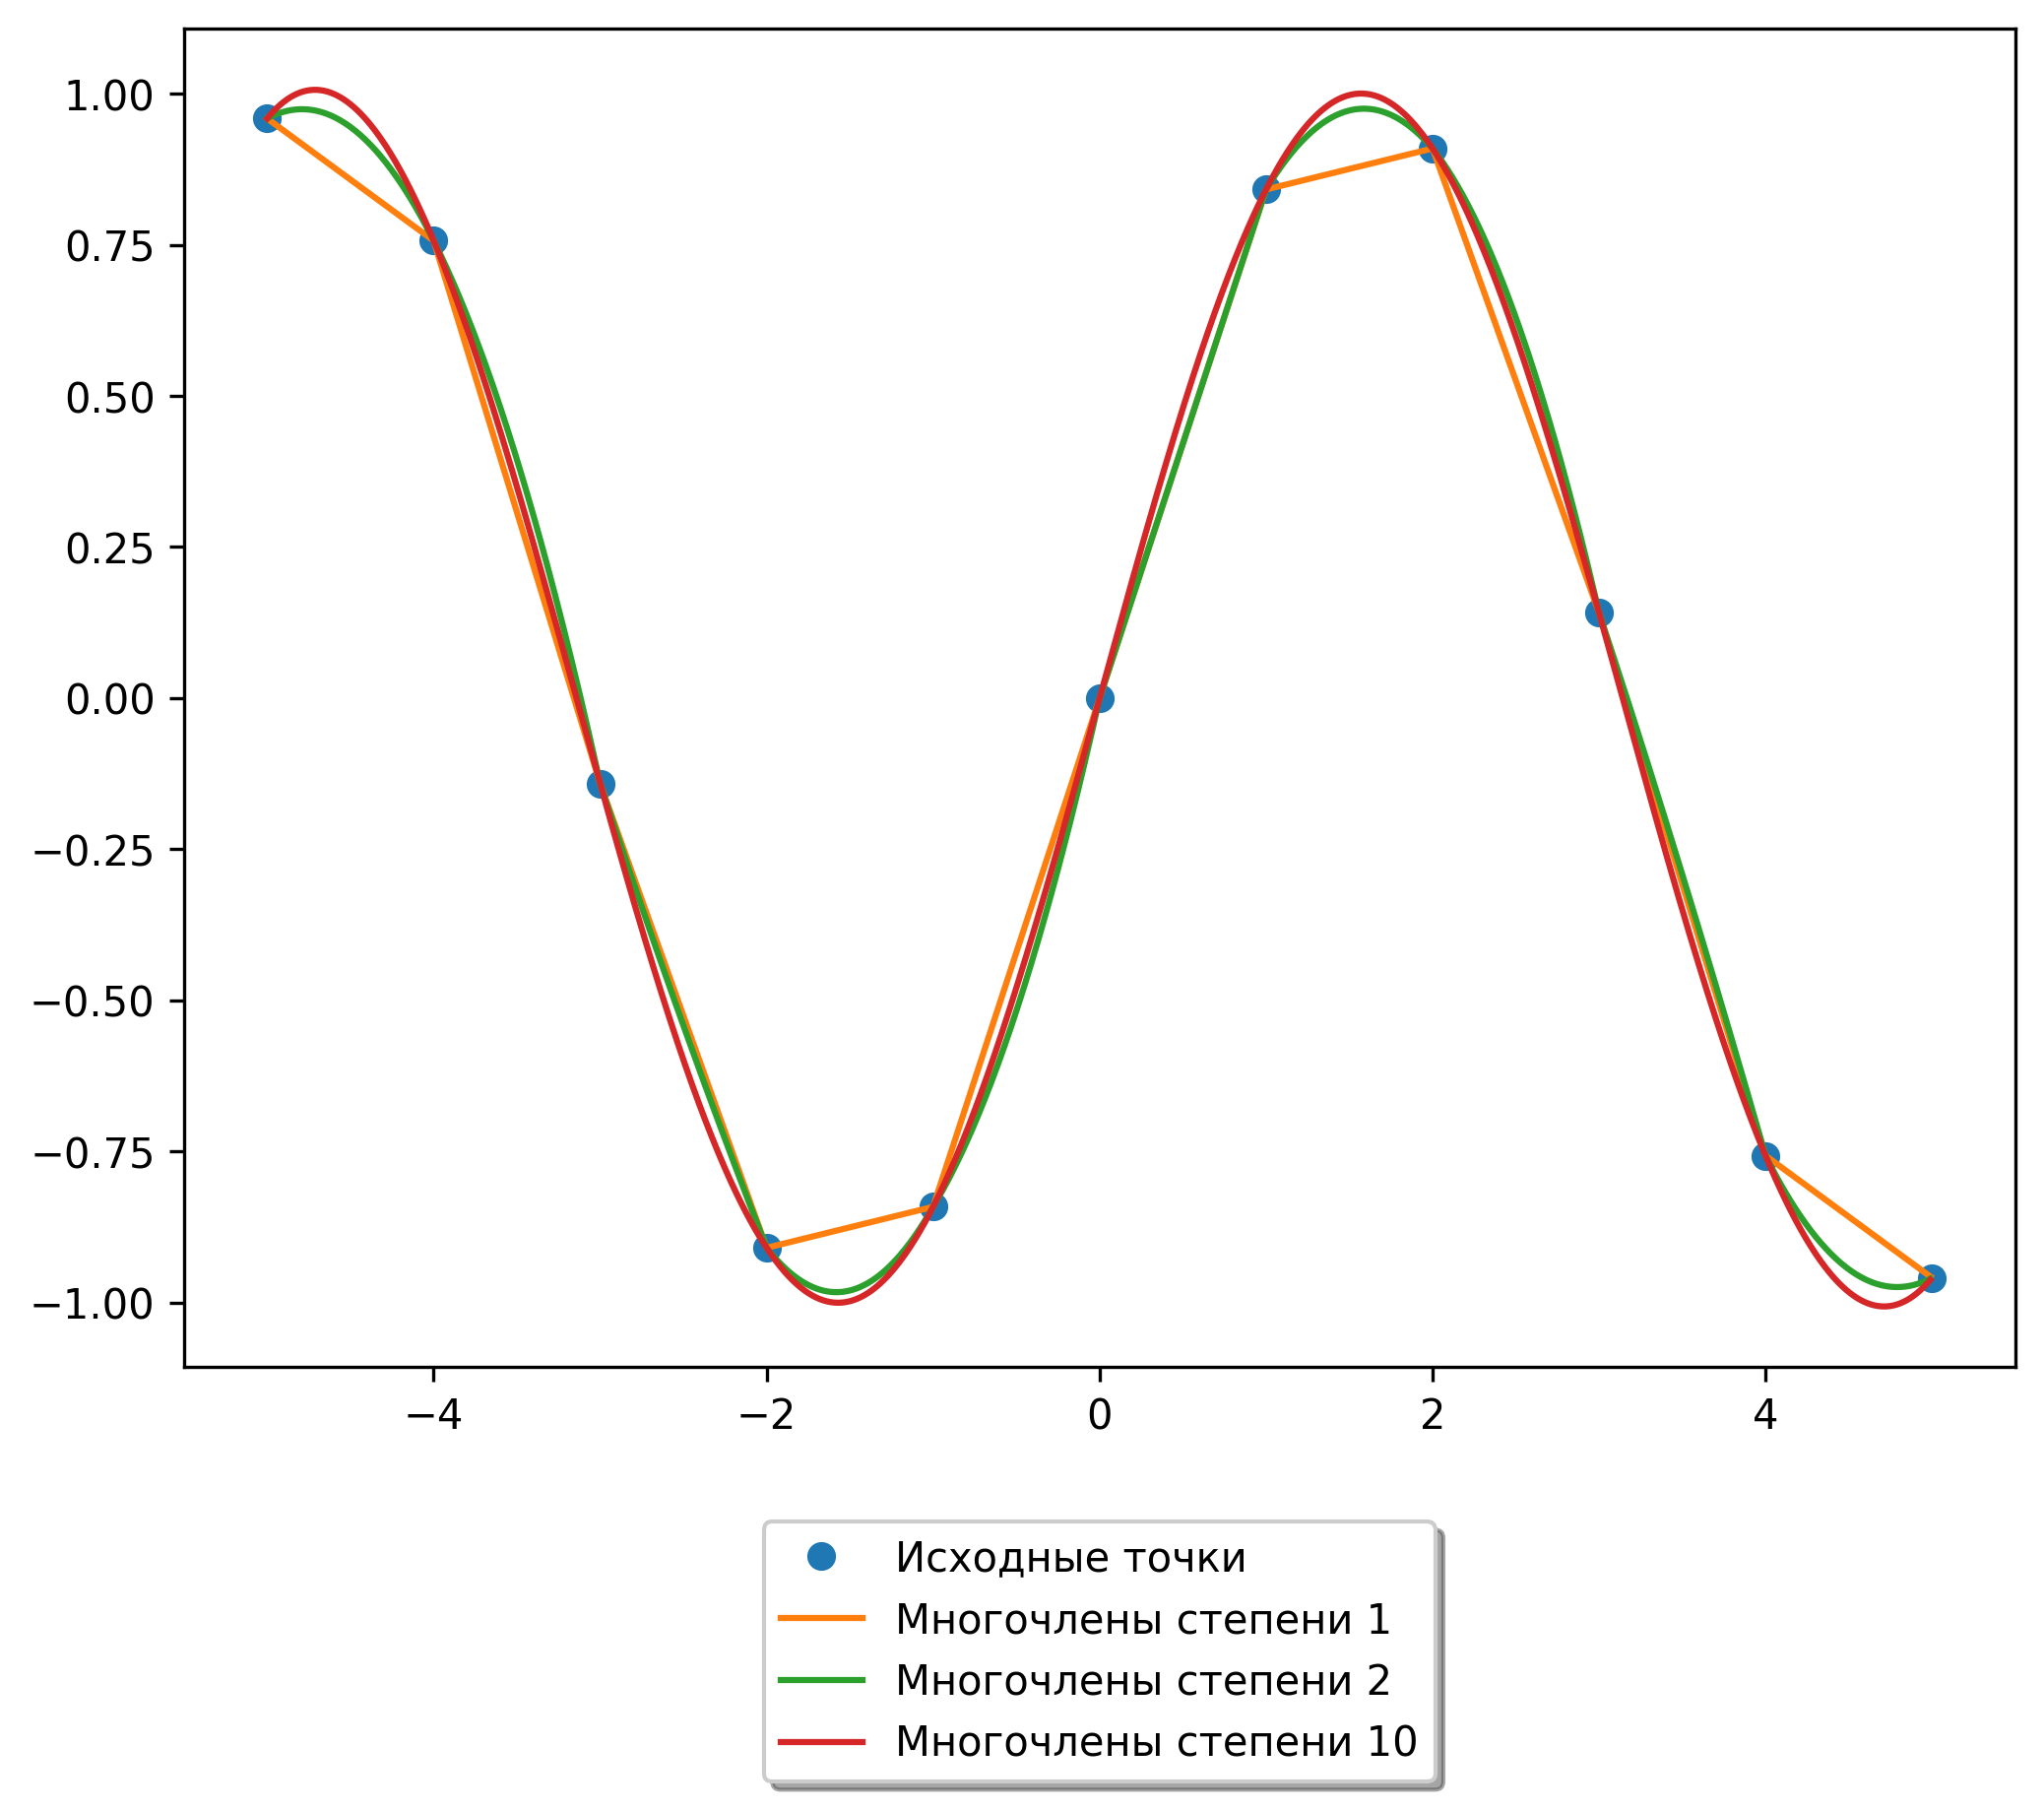

In [51]:
approximations = {}
for i in [1, 2, 10]:
    approximations[i] = pd.read_csv(f'poly{i}.csv', sep=';', names=['x', 'y'])

plt.figure(figsize=(8, 6), dpi=300)

plt.plot(ethalon['x'], ethalon['y'], 'o', label='Исходные точки')
for key, val in approximations.items():
    plt.plot(val['x'], val['y'], label=f'Многочлены степени {key}')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True)